# Завдання 1


Створіть граф за допомогою бібліотеки networkX для моделювання певної реальної мережі (наприклад, транспортної мережі міста, соціальної мережі, інтернет-топології).

INFO
📖 Реальну мережу можна вибрати на свій розсуд, якщо немає можливості придумати свою мережу, наближену до реальності.

Візуалізуйте створений граф, проведіть аналіз основних характеристик (наприклад, кількість вершин та ребер, ступінь вершин).


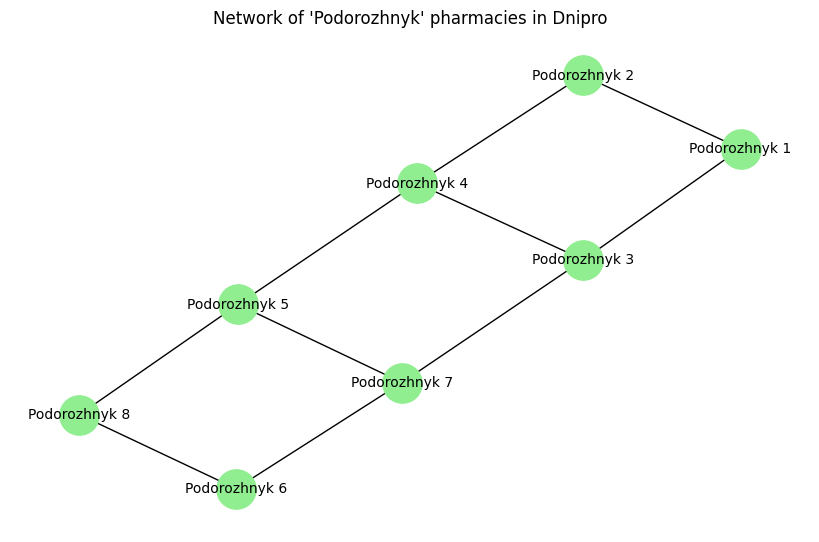

Кількість вершин: 8
Кількість ребер: 10
Ступінь вершин:
Podorozhnyk 1: 0.29
Podorozhnyk 2: 0.29
Podorozhnyk 3: 0.43
Podorozhnyk 4: 0.43
Podorozhnyk 5: 0.43
Podorozhnyk 6: 0.29
Podorozhnyk 7: 0.43
Podorozhnyk 8: 0.29


In [18]:
import networkx as nx
import matplotlib.pyplot as plt

# Створення графу мережі аптек "Подорожник" у місті Дніпро
graph = nx.Graph()

# Додавання вузлів (аптеки)
pharmacies = [
    "Podorozhnyk 1",
    "Podorozhnyk 2",
    "Podorozhnyk 3",
    "Podorozhnyk 4",
    "Podorozhnyk 5",
    "Podorozhnyk 6",
    "Podorozhnyk 7",
    "Podorozhnyk 8",
]
graph.add_nodes_from(pharmacies)

# Додавання ребер (маршрути між аптеками)
routes = [
    ("Podorozhnyk 1", "Podorozhnyk 2"),
    ("Podorozhnyk 1", "Podorozhnyk 3"),
    ("Podorozhnyk 2", "Podorozhnyk 4"),
    ("Podorozhnyk 3", "Podorozhnyk 4"),
    ("Podorozhnyk 4", "Podorozhnyk 5"),
    ("Podorozhnyk 5", "Podorozhnyk 7"),
    ("Podorozhnyk 5", "Podorozhnyk 8"),
    ("Podorozhnyk 6", "Podorozhnyk 7"),
    ("Podorozhnyk 6", "Podorozhnyk 8"),
    ("Podorozhnyk 7", "Podorozhnyk 3"),
]

graph.add_edges_from(routes)

# Візуалізація графу
plt.figure(figsize=(8, 5))
nx.draw(
    graph,
    with_labels=True,
    node_size=800,
    node_color="lightgreen",
    font_size=10,
    font_color="black",
)
plt.title("Network of 'Podorozhnyk' pharmacies in Dnipro")
plt.show()

# Аналіз основних характеристик
num_nodes = graph.number_of_nodes()
num_edges = graph.number_of_edges()
degree_centrality = nx.degree_centrality(graph)

# Виведення результатів
print(f"Кількість вершин: {num_nodes}")
print(f"Кількість ребер: {num_edges}")
print("Ступінь вершин:")
for node, centrality in degree_centrality.items():
    print(f"{node}: {centrality:.2f}")

# Завдання 2


Напишіть програму, яка використовує алгоритми DFS і BFS для знаходження шляхів у графі, який було розроблено у першому завданні.

Далі порівняйте результати виконання обох алгоритмів для цього графа, висвітлить різницю в отриманих шляхах. Поясніть, чому шляхи для алгоритмів саме такі.


In [42]:
def dfs(graph, start, goal):
    visited = set()
    # Використовуємо стек для зберігання вершин
    stack = [(start, [start])]

    while stack:
        # Вилучаємо вершину та шлях зі стеку
        (vertex, path) = stack.pop()
        # Перевіряємо, чи була вершина відвідана
        if vertex not in visited:
            # Якщо вершина є цільовою, повертаємо шлях
            if vertex == goal:
                return path
            # Додаємо вершину до множини відвіданих
            visited.add(vertex)
            # Додаємо всіх невідвіданих сусідів вершини до стеку з оновленим шляхом
            for neighbor in set(graph.neighbors(vertex)) - visited:
                stack.append((neighbor, path + [neighbor]))
    # Якщо шлях не знайдено, повертаємо None
    return None

In [45]:
from collections import deque


def bfs(graph, start, goal):
    # Ініціалізація порожньої множини для зберігання відвіданих вершин
    visited = set()
    # Ініціалізація черги з початковою вершиною та шляхом
    queue = deque([(start, [start])])

    while queue:  # Поки черга не порожня, продовжуємо обхід
        # Вилучаємо першу вершину з черги
        (vertex, path) = queue.popleft()
        # Перевіряємо, чи була вершина відвідана раніше
        if vertex not in visited:
            # Якщо вершина є цільовою, повертаємо шлях
            if vertex == goal:
                return path
            # Додаємо вершину до множини відвіданих вершин
            visited.add(vertex)
            # Додаємо всіх невідвіданих сусідів вершини до кінця черги
            for neighbor in set(graph.neighbors(vertex)) - visited:
                queue.append((neighbor, path + [neighbor]))
    # Якщо шлях не знайдено, повертаємо None
    return None

In [46]:
# Вихідні та цільові вузли
start_node = "Podorozhnyk 1"
target_node = "Podorozhnyk 8"

# Знаходження шляхів за допомогою DFS та BFS
dfs_path = dfs(graph, start_node, target_node)
bfs_path = bfs(graph, start_node, target_node)

# Виведення результатів
print(f"Шлях від {start_node} до {target_node} за допомогою DFS: {dfs_path}")
print(f"Шлях від {start_node} до {target_node} за допомогою BFS: {bfs_path}")

# Порівняння результатів DFS та BFS
print("Порівняння результатів DFS та BFS:")
print(
    f"Довжина шляху за допомогою DFS: {len(dfs_path) if dfs_path else 'Шлях не знайдено'}"
)
print(
    f"Довжина шляху за допомогою BFS: {len(bfs_path) if bfs_path else 'Шлях не знайдено'}"
)

Шлях від Podorozhnyk 1 до Podorozhnyk 8 за допомогою DFS: ['Podorozhnyk 1', 'Podorozhnyk 3', 'Podorozhnyk 4', 'Podorozhnyk 5', 'Podorozhnyk 8']
Шлях від Podorozhnyk 1 до Podorozhnyk 8 за допомогою BFS: ['Podorozhnyk 1', 'Podorozhnyk 2', 'Podorozhnyk 4', 'Podorozhnyk 5', 'Podorozhnyk 8']
Порівняння результатів DFS та BFS:
Довжина шляху за допомогою DFS: 5
Довжина шляху за допомогою BFS: 5


# Завдання 3


Реалізуйте алгоритм Дейкстри для знаходження найкоротшого шляху в розробленому графі: додайте у граф ваги до ребер та знайдіть найкоротший шлях між всіма вершинами графа.


In [44]:
def dijkstra(graph: nx.Graph, start: str):
    # Ініціалізація відстаней та множини невідвіданих вершин
    distances = {vertex: float("infinity") for vertex in graph.nodes}
    distances[start] = 0
    unvisited = list(graph.nodes)
    previous_nodes = {vertex: None for vertex in graph.nodes}

    while unvisited:
        # Знаходження вершини з найменшою відстанню серед невідвіданих
        current_vertex = min(unvisited, key=lambda vertex: distances[vertex])

        # Якщо поточна відстань є нескінченністю, то ми завершили роботу
        if distances[current_vertex] == float("infinity"):
            break

        for neighbor in graph.neighbors(current_vertex):
            weight = graph[current_vertex][neighbor].get(
                "weight", 1
            )  # Використовуємо стандартну вагу 1, якщо вага не вказана
            distance = distances[current_vertex] + weight

            # Якщо нова відстань коротша, то оновлюємо найкоротший шлях
            if distance < distances[neighbor]:
                distances[neighbor] = distance
                previous_nodes[neighbor] = current_vertex

        # Видаляємо поточну вершину з множини невідвіданих
        unvisited.remove(current_vertex)

    return distances, previous_nodes


# Функція для відновлення шляху від стартової вершини до цільової
def get_path(previous_nodes, start, target):
    path = []
    current = target
    while current != start:
        path.append(current)
        current = previous_nodes[current]
    path.append(start)
    path.reverse()
    return path


# Вихідна вершина
start_node = "Podorozhnyk 1"

# Знаходження найкоротших шляхів за допомогою алгоритму Дейкстри
distances, previous_nodes = dijkstra(graph, start_node)

# Виведення результатів
print(f"Найкоротші шляхи від {start_node}:")
for node in graph.nodes:
    path = get_path(previous_nodes, start_node, node)
    print(f"До {node}: шлях {path} з відстанню {distances[node]}")

Найкоротші шляхи від Podorozhnyk 1:
До Podorozhnyk 1: шлях ['Podorozhnyk 1'] з відстанню 0
До Podorozhnyk 2: шлях ['Podorozhnyk 1', 'Podorozhnyk 2'] з відстанню 1
До Podorozhnyk 3: шлях ['Podorozhnyk 1', 'Podorozhnyk 3'] з відстанню 1
До Podorozhnyk 4: шлях ['Podorozhnyk 1', 'Podorozhnyk 2', 'Podorozhnyk 4'] з відстанню 2
До Podorozhnyk 5: шлях ['Podorozhnyk 1', 'Podorozhnyk 2', 'Podorozhnyk 4', 'Podorozhnyk 5'] з відстанню 3
До Podorozhnyk 6: шлях ['Podorozhnyk 1', 'Podorozhnyk 3', 'Podorozhnyk 7', 'Podorozhnyk 6'] з відстанню 3
До Podorozhnyk 7: шлях ['Podorozhnyk 1', 'Podorozhnyk 3', 'Podorozhnyk 7'] з відстанню 2
До Podorozhnyk 8: шлях ['Podorozhnyk 1', 'Podorozhnyk 2', 'Podorozhnyk 4', 'Podorozhnyk 5', 'Podorozhnyk 8'] з відстанню 4
